# Simple Regression Techniques

Linear regression is a simple approach to statistical learning and a useful tool for predicting a
quantitative response.

Although it is relatively simple when compared to some of the more advanced techniques, it is still
a widely used and useful technique.

## Simple linear regression

Simple linear regression is the most straightforward approach for predicting a quantitative response
$Y$ on the basis of a single predictor $X$. 

We make the assumption that there is a linear relationship between $Y$ and $X$.

Fitting a simple linear regression model in Python is easy using the fantastic `sklearn` package.
Load the modules that we need to get started:


In [1]:
# pip install scikit-learn seaborn pandas

In [19]:
from sklearn.datasets import fetch_openml
from sklearn import linear_model

We will work with the Ames housing dataset. Let's assign the input data `X` and response target `y`:


In [20]:
housing = fetch_openml(name="house_prices", as_frame=True)
X, y = housing.data, housing.target

We can produce a simple scatter plot of the response `SalePrice` against the predictor `YearBuilt`:


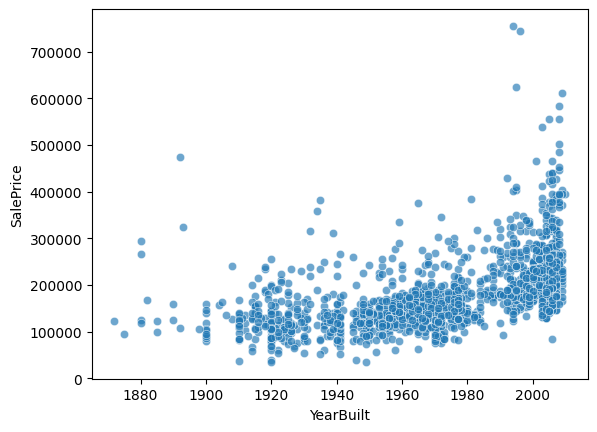

In [21]:
import seaborn as sns
ax = sns.scatterplot(x=X["YearBuilt"], y=y, alpha=0.65)

To fit a model using just a single predictor we first extract the training variables:


In [22]:
X_train = X["YearBuilt"]
y_train = y

Unfortunately, `sklearn`'s various model fitting functions typically expect a two dimensional
object for the covariates.

We can ensure this by making sure `X_train` remains to be a `DataFrame`:


In [23]:
X_train = X_train.to_frame()

Create a `LinearRegression` object:


In [24]:
model = linear_model.LinearRegression()

We then pass the data to the model object's `.fit()` method:


In [25]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can make predictions from our fitted model with the `.predict()` method:


In [26]:
import pandas as pd

new_value = pd.DataFrame([1980], columns=["YearBuilt"])
model.predict(new_value)

array([192931.22078269])

In [27]:
multiple_values = pd.DataFrame(
    [1940, 1970, 2000], columns=["YearBuilt"]
)
model.predict(multiple_values)

array([137916.28206521, 179177.48610332, 220438.69014143])

Fitted values of a model typically describes the predicted $\hat{y}$ for the observations $X$.

To get the model fitted values we could just predict from the model using the values used to train
it:


In [28]:
fitted = model.predict(X_train)

And then create a plot with the added fitted line:


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

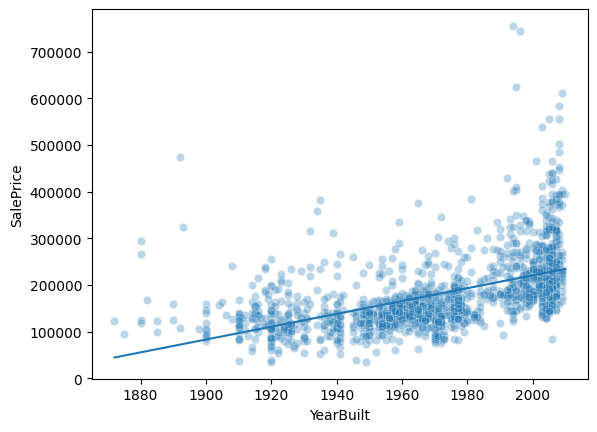

In [29]:
sns.scatterplot(x=X["YearBuilt"], y=y, alpha=0.3)
sns.lineplot(x=X["YearBuilt"], y=fitted)

The coefficients of the fitted model are kept in the `model.coef_` attribute:


In [30]:
model.coef_

array([1375.37346794])

This gives us the expected change in $y$ for a unit change in $X$.

## Multiple linear regression

In practice we typically have more than a single predictor. 

Let's now use a few variables from the housing data. 


In [31]:
features = ["YearBuilt", "LotArea", "OverallQual"]
X_train = X[features]

Again, we should do some exploratory graphical analysis of the features


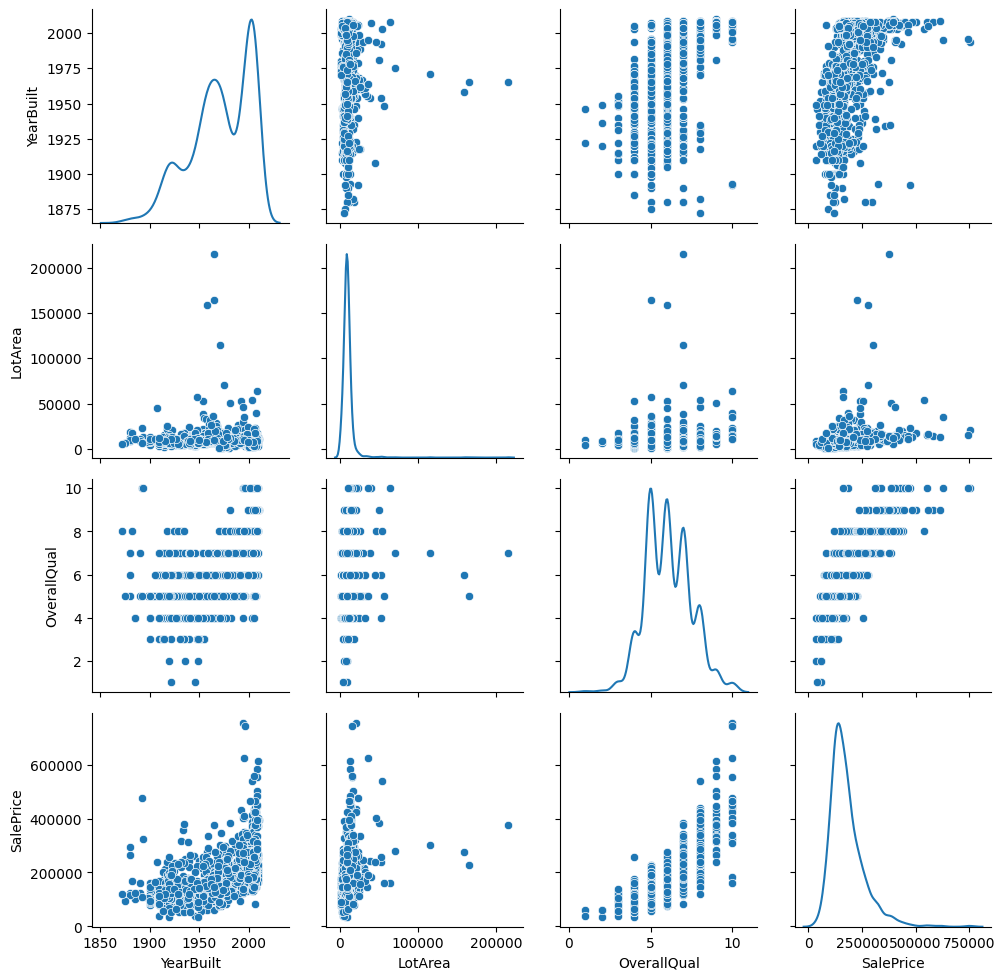

In [32]:
grid = sns.PairGrid(
    data=pd.concat([X_train, y_train], axis=1),
    diag_sharey=False,
)
grid.map_offdiag(sns.scatterplot)
grid.map_diag(sns.kdeplot)

If we are happy, we can proceed to fit the model in the same way


In [33]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


And then make predictions


In [34]:
new_values = X_train.mean().to_frame().T
model.predict(new_values)

array([180921.19589041])

### Z-score standardisation

Z-score standardisation rescales each independent variable such that it has zero mean and unit
variance.

Given original data $x$ we can define the transformed data

$$x' = \frac{x - \bar{x}}{s},$$

where $\bar{x}$ is the sample mean and $s$ is the sample standard deviation

This scaling doesn't affect prediction, but makes the size of the coefficients directly comparable.

This sort of scaling is popular in linear models.

The `sklearn.preprocessing` module has a `StandardScaler()` which can be used to employ this
type of zero mean unit variance scaling:


In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


We can then create a scaled training set:


In [36]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled[0]

array([ 1.05099379, -0.20714171,  0.65147924])

## Creating a pipeline

We need to apply the same scaling transformation to both the training and prediction datasets

`sklearn.pipeline.Pipeline()` provides a convenient approach to doing-so:


In [39]:
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ("preprocess", preprocessing.StandardScaler()),
        ("regression", linear_model.LinearRegression()),
    ]
)

Having created the `Pipeline` object we can now fit as before.

Calling `.fit()` now runs the `"preprocess"` step and then the `"regression"` step.

When we predict, the new values will also pass through both stages of our pipeline:


In [40]:
model.fit(X_train, y_train)
new_values = X_train.mean().to_frame().T
model.predict(new_values)

array([180921.19589041])